# 线性回归

In [1]:
import torch
import matplotlib.pyplot as plt
torch.__version__

'1.7.1+cpu'

In [2]:
torch.manual_seed(10)#随机数种子
lr = 0.1 #学习率

In [3]:
x = torch.rand(20,1)
x

tensor([[0.4581],
        [0.4829],
        [0.3125],
        [0.6150],
        [0.2139],
        [0.4118],
        [0.6938],
        [0.9693],
        [0.6178],
        [0.3304],
        [0.5479],
        [0.4440],
        [0.7041],
        [0.5573],
        [0.6959],
        [0.9849],
        [0.2924],
        [0.4823],
        [0.6150],
        [0.4967]])

In [4]:
# y=2x+5
y= 2*x + 5+ torch.randn(20,1)  
y

tensor([[6.9925],
        [5.8995],
        [5.7565],
        [6.3981],
        [7.0573],
        [3.7052],
        [7.1703],
        [7.8690],
        [7.0157],
        [4.7192],
        [5.2370],
        [6.2448],
        [7.7440],
        [6.4220],
        [7.0195],
        [6.8693],
        [6.6354],
        [5.3193],
        [7.2243],
        [4.3580]])

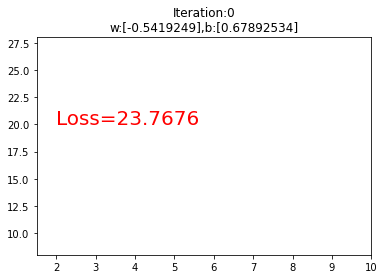

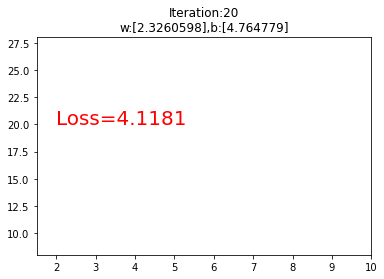

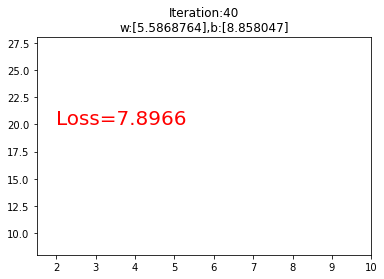

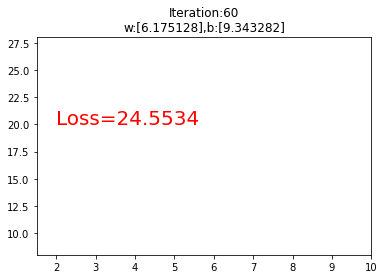

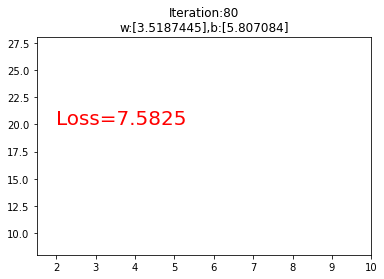

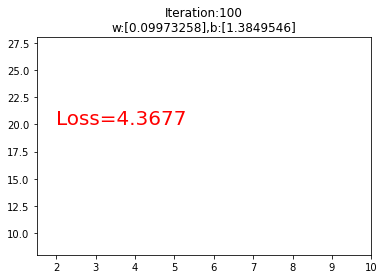

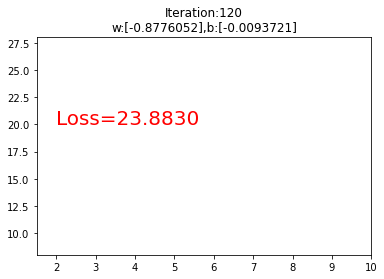

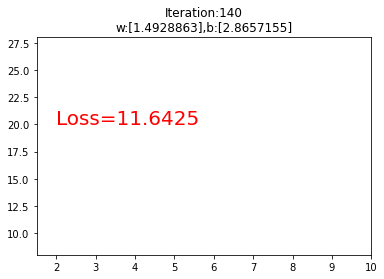

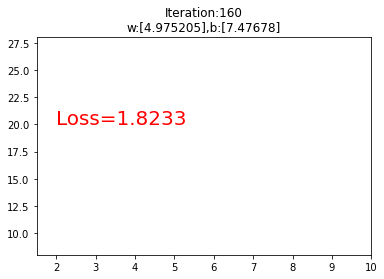

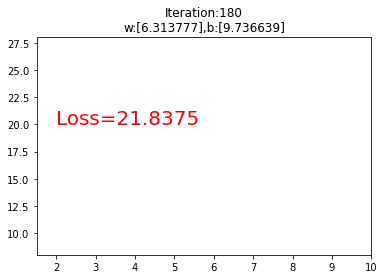

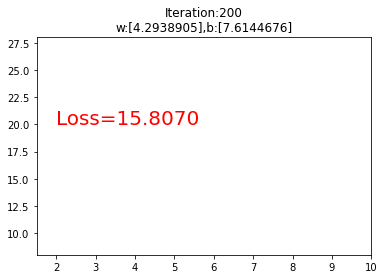

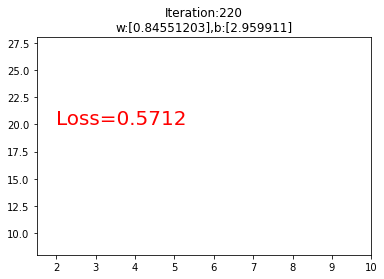

In [10]:
w = torch.randn((1),requires_grad=True)
b = torch.zeros((1),requires_grad=True)

for iteration in range(1000):
    # 前向传播 y = w*x +b
    wx = torch.mul(w,x)
    y_pred = torch.add(wx,b) 
    # 计算MSE loss
    loss = (0.5*(y-y_pred)**2).mean()
    # 反向传播
    loss.backward()
    # 更新参数
    b.data.sub_(lr*b.grad)  # b=b-lr*b.grad
    w.data.sub_(lr*w.grad)  # w=w-lr*w.grad
    
    # 绘图
    if iteration % 20 == 0:
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),y_pred.data.numpy(),'r-',lw=5)
        plt.text(2,20,'Loss=%.4f'%loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.xlim(1.5,10)
        plt.ylim(8,28)
        plt.title("Iteration:{}\nw:{},b:{}".format(iteration,w.data.numpy(),b.data.numpy()))
        plt.pause(0.5)

        if loss.data.numpy() < 1:#停止条件
            break